In [38]:
# import needed packages

import pandas as pd
import sqlite3

# load two csv files directly from github repo

sales = pd.read_csv("https://raw.githubusercontent.com/VallieTracy/opioids_project/master/Resources/opioidPrescriptionSales.csv")
deaths = pd.read_csv("https://raw.githubusercontent.com/VallieTracy/opioids_project/master/Resources/drugPoisoningDeaths.csv")

# Establish a connection to the SQLite database
conn = sqlite3.connect('data/opiods.db')

# Write the DataFrames to the database
deaths.to_sql('deaths', conn, if_exists='replace', index=False)
sales.to_sql('sales', conn, if_exists='replace', index=False)

# Commit the changes and close the connection
conn.commit()
conn.close()


C:\Users\lizba\anaconda3\lib\site-packages\pandas\core\generic.py:2779: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


In [39]:
sales.head(1)

,Index,Fips,Location,Oxycodone / Hydrocodone,TimeFrame,Data Type,Data,MOE
0,1,1,Alabama,Oxycodone,2000,"Rate per 100,000",6.74399,NaN


In [40]:
deaths.head(1)

,Index,Fips,Location,Drug Type,TimeFrame,Data Type,Data,MOE
0,1,1,Alabama,Cocaine,2000,"Rate per 100,000",NaN,NaN


In [41]:
# Connect to the SQLite database
conn = sqlite3.connect('data/opiods.db')

# join deaths and sales table, query for just MN and Oxycododone
query = "SELECT deaths.Fips, deaths.Location, deaths.[TimeFrame], deaths.[Drug Type], " \
        "deaths.Data as deaths_data, sales.Data as oxy_sales_data " \
        "FROM deaths " \
        "INNER JOIN sales ON sales.Fips = deaths.Fips and sales.TimeFrame = deaths.TimeFrame " \
        "WHERE [Drug Type] = 'All opioids' and deaths.Location = 'Minnesota'" \
        "AND [Oxycodone / Hydrocodone] = 'Oxycodone' " \
        "ORDER BY deaths.Location, deaths.TimeFrame"


# load into df
df = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

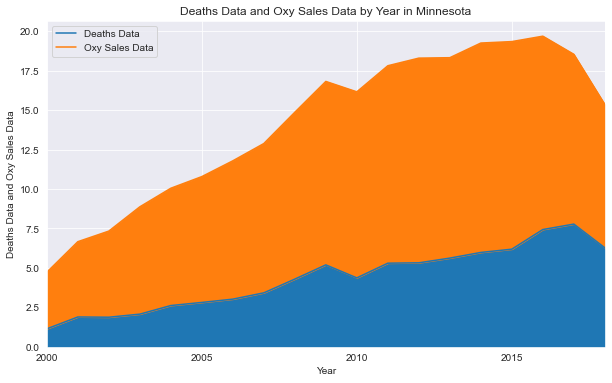

In [42]:
# Connect to the SQLite database
import matplotlib.pyplot as plt
# Convert the TimeFrame column to datetime format
df['TimeFrame'] = pd.to_datetime(df['TimeFrame'], format='%Y')
df.drop('Fips', axis=1, inplace=True)
# Set the TimeFrame column as the index
df.set_index('TimeFrame', inplace=True)
# plot sales per 10,000 and death by 10,000
df.plot(kind='area', figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Deaths Data and Oxy Sales Data')
plt.title('Deaths Data and Oxy Sales Data by Year in Minnesota')
plt.legend(['Deaths Data', 'Oxy Sales Data'])
plt.show()

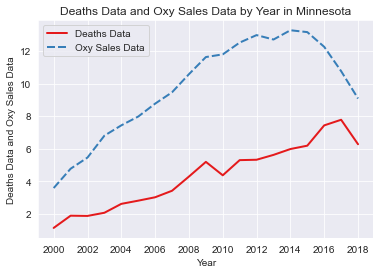

In [43]:
# Connect to the SQLite database
conn = sqlite3.connect('data/opiods.db')

# join deaths and sales table, query for just MN and Oxycododone
query = "SELECT deaths.Fips, deaths.Location, deaths.[TimeFrame], deaths.[Drug Type], " \
        "deaths.Data as deaths_data, sales.Data as oxy_sales_data " \
        "FROM deaths " \
        "INNER JOIN sales ON sales.Fips = deaths.Fips and sales.TimeFrame = deaths.TimeFrame " \
        "WHERE [Drug Type] = 'All opioids' and deaths.Location = 'Minnesota'" \
        "AND [Oxycodone / Hydrocodone] = 'Oxycodone' " \
        "ORDER BY deaths.Location, deaths.TimeFrame"


# load into df
df = pd.read_sql_query(query, conn)

# Close the connection
conn.close()


import seaborn as sns
import matplotlib.pyplot as plt
# Set the style to whitegrid
sns.set_style("darkgrid")

# Convert the TimeFrame column to datetime format
df['TimeFrame'] = pd.to_datetime(df['TimeFrame'], format='%Y')
df.drop('Fips', axis=1, inplace=True)
# Set the TimeFrame column as the index
df.set_index('TimeFrame', inplace=True)

# Plot the area graph using seaborn
sns.lineplot(data=df, linewidth=2, palette="Set1")

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Deaths Data and Oxy Sales Data')
plt.title('Deaths Data and Oxy Sales Data by Year in Minnesota')
plt.legend(['Deaths Data', 'Oxy Sales Data'])

# Show the plot
plt.show()


In [44]:
# Connect to the SQLite database
conn = sqlite3.connect('data/opiods.db')
# join deaths and sales table, query for just MN and Oxycododone
query2 = "SELECT deaths.Fips, deaths.Location, deaths.[TimeFrame], deaths.[Drug Type], " \
        "deaths.Data as deaths_data, sales.Data as HydrocodoneSales " \
        "FROM deaths " \
        "INNER JOIN sales ON sales.Fips = deaths.Fips and sales.TimeFrame = deaths.TimeFrame " \
        "WHERE [Drug Type] = 'All opioids' and deaths.Location = 'Minnesota'" \
        "AND [Oxycodone / Hydrocodone] = 'Hydrocodone' " \
        "ORDER BY deaths.Location, deaths.TimeFrame"


# load into df
df2 = pd.read_sql_query(query2, conn)
df2

# Close the connection
conn.close()
df2

import seaborn as sns
import matplotlib.pyplot as plt
# Set the style to whitegrid
sns.set_style("darkgrid")

# Convert the TimeFrame column to datetime format
df2['TimeFrame'] = pd.to_datetime(df2['TimeFrame'], format='%Y')
df2 = df2.drop('Fips', axis=1, inplace=True)
# Set the TimeFrame column as the index
df2.set_index('TimeFrame', inplace=True)

# Plot the area graph using seaborn
sns.lineplot(data=df2, linewidth=2, palette="Set1")

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Deaths Data and Oxy Sales Data')
plt.title('Deaths Data and Oxy Sales Data by Year in Minnesota')
plt.legend(['Deaths Data', 'Oxy Sales Data'])

# Show the plot
plt.show()




AttributeError: 'NoneType' object has no attribute 'set_index'

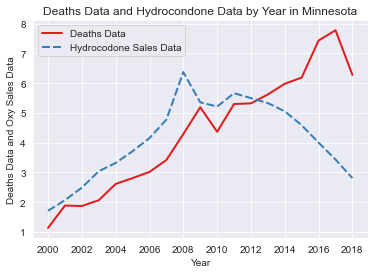

In [45]:
# Connect to the SQLite database
conn = sqlite3.connect('data/opiods.db')
# join deaths and sales table, query for just MN and Oxycododone
query2 = "SELECT deaths.Fips, deaths.Location, deaths.[TimeFrame], deaths.[Drug Type], " \
        "deaths.Data as deaths_data, sales.Data as HydrocodoneSales " \
        "FROM deaths " \
        "INNER JOIN sales ON sales.Fips = deaths.Fips and sales.TimeFrame = deaths.TimeFrame " \
        "WHERE [Drug Type] = 'All opioids' and deaths.Location = 'Minnesota'" \
        "AND [Oxycodone / Hydrocodone] = 'Hydrocodone' " \
        "ORDER BY deaths.Location, deaths.TimeFrame"


# load into df
df2 = pd.read_sql_query(query2, conn)


# Close the connection
conn.close()


#df2
#df2["TimeFrame"] = pd.datetime(df2["TimeFrame"],format='%Y')
#df2

df2['TimeFrame'] = pd.to_datetime(df2['TimeFrame'], format='%Y')
df2

df2.drop('Fips', axis=1, inplace=True)
# Set the TimeFrame column as the index
df2.set_index('TimeFrame', inplace=True)

# Plot the area graph using seaborn
sns.lineplot(data=df2, linewidth=2, palette="Set1")

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Deaths Data and Oxy Sales Data')
plt.title('Deaths Data and Hydrocondone Data by Year in Minnesota')
plt.legend(['Deaths Data', 'Hydrocodone Sales Data'])

# Show the plot
plt.show()

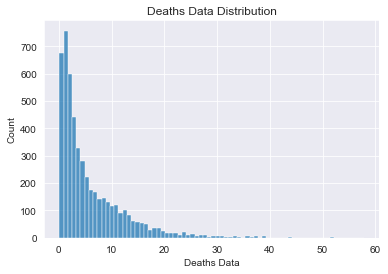

In [46]:
sns.histplot(data=deaths, x="Data")
plt.title("Deaths Data Distribution")
plt.xlabel("Deaths Data")
plt.ylabel("Count")
plt.show()

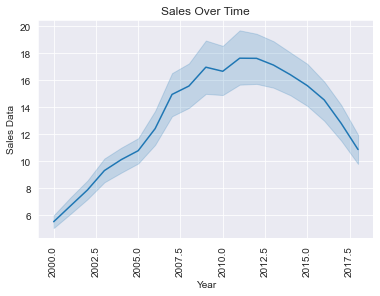

In [47]:
sns.lineplot(x="TimeFrame", y="Data", data=sales)
plt.title("Sales Over Time")
plt.xlabel("Year")
plt.ylabel("Sales Data")
plt.xticks(rotation=90)
plt.show()

In [ ]:
sales_pivot = sales.pivot("Location", "TimeFrame", "Data")
sns.heatmap(sales_pivot, cmap="YlGnBu", annot=True)
plt.title("Sales by Location and Year")
plt.xlabel("Year")
plt.ylabel("Location")
plt.show()

In [ ]:
sns.scatterplot(x="Data", y="Data", hue="Location", data=sales, label="Sales")
sns.scatterplot(x="Data", y="Data", hue="Location", data=deaths, label="Deaths")
plt.title("Sales and Deaths by Location")
plt.xlabel("Data")
plt.ylabel("Data")
plt.legend()
plt.show()